In [39]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report 
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['title']= df['Name'].str.extract(r"([A-Za-z]+)\.",expand=False)

In [6]:
df['title'].value_counts()

title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [7]:
df['title']=df['title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 
                                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')

In [8]:
df['title']=df['title'].replace('Mlle','Miss')
df['title']=df['title'].replace('Ms','Miss')
df['title']=df['title'].replace('Mme','Mrs')



In [9]:
df['FamilySize'] =df['SibSp']+df['Parch']+1

In [10]:
df['isAlone']=1
df['isAlone'].loc[df['FamilySize']>1]=0

C:\Users\Abhijith\AppData\Local\Temp\ipykernel_11136\3083067596.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['isAlone'].loc[df['FamilySize']>1]=0
C:\Users\Abhijith\AppData\Local\Temp\ipykernel_11136\3083067596.py:2: SettingWithCopy

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        891 non-null    object 
 13  FamilySize   891 non-null    int64  
 14  isAlone      891 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
title            0
FamilySize       0
isAlone          0
dtype: int64

In [13]:
df['Age']=df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'))


In [14]:
df.drop('Cabin',axis =1,inplace=True)

In [15]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [17]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'] )

In [18]:
df = pd.get_dummies(df, columns=['Embarked', 'title'], drop_first=True)


In [19]:
Absoute_df= df.drop(columns=["Ticket","Name"],axis=1)

In [35]:
Absoute_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,isAlone,Embarked_Q,Embarked_S,title_Miss,title_Mr,title_Mrs,title_Rare
0,1,0,3,1,-0.552360,0.432793,-0.473674,-0.502445,0.059160,0,False,True,False,True,False,False
1,2,1,1,0,0.659475,0.432793,-0.473674,0.786845,0.059160,0,False,False,False,False,True,False
2,3,1,3,0,-0.249401,-0.474545,-0.473674,-0.488854,-0.560975,1,False,True,True,False,False,False
3,4,1,1,0,0.432256,0.432793,-0.473674,0.420730,0.059160,0,False,True,False,False,True,False
4,5,0,3,1,0.432256,-0.474545,-0.473674,-0.486337,-0.560975,1,False,True,False,True,False,False


In [21]:
Absoute_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'FamilySize', 'isAlone', 'Embarked_Q', 'Embarked_S',
       'title_Miss', 'title_Mr', 'title_Mrs', 'title_Rare'],
      dtype='object')

In [22]:
scale_cols = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']

In [26]:
scaler =StandardScaler()

In [27]:
Absoute_df[scale_cols]= scaler.fit_transform(Absoute_df[scale_cols])

In [33]:
Absoute_df[scale_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,891.0,9.968332e-17,1.000562,-2.186823,-0.552360,-0.249401,0.583736,3.840543
SibSp,891.0,4.386066e-17,1.000562,-0.474545,-0.474545,-0.474545,0.432793,6.784163
Parch,891.0,5.382900e-17,1.000562,-0.473674,-0.473674,-0.473674,-0.473674,6.974147
Fare,891.0,3.987333e-18,1.000562,-0.648422,-0.489148,-0.357391,-0.024246,9.667167
FamilySize,891.0,-2.392400e-17,1.000562,-0.560975,-0.560975,-0.560975,0.059160,5.640372


In [36]:
from sklearn.model_selection import train_test_split

X = Absoute_df.drop(['Survived', 'PassengerId'], axis=1)
y = Absoute_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



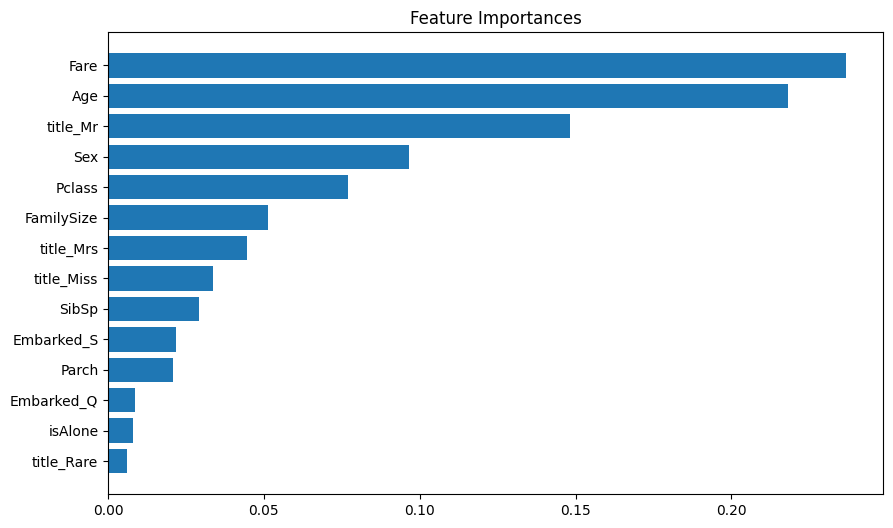

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you're using RandomForest
importances = model.feature_importances_
features = X.columns

# Sort features by importance
feat_df = pd.DataFrame({"Feature": features, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_df["Feature"], feat_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importances")
plt.show()
